# **CIBA - PYTHON INTERMEDIO**

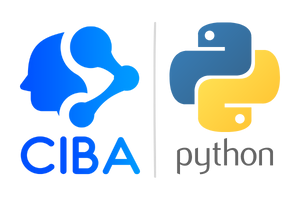


# SESIÓN 2 - TEMA 1: Visualización de datos con Pandas y Seaborn

Contenido:

* Gráficos usando con Pandas y Seaborn
* Introducción a creación de Dashboards con Panel/Hvplot


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #tienen facilidad para usarse con dataframe de pandas

In [2]:
%matplotlib inline
sns.set()

In [3]:
sns.set_theme()
sns.set(rc = {"figure.dpi" : 150}) #tamaño de pixeles de la imagen
sns.set(rc = {"figure.figsize": (6,3)}) #dimensiones de la imagen

In [4]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Dibujemos un diagrama de líneas de la longitud del pétalo en el conjunto de datos del iris.

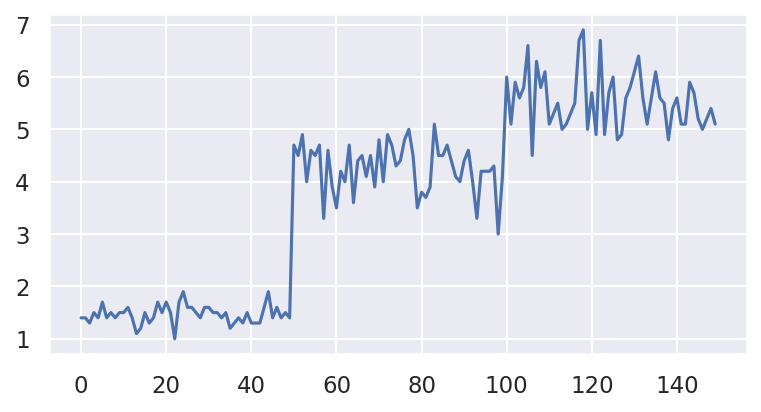

In [5]:
iris.petal_length.plot()

Ahora dibujemos el diagrama de líneas de todas las columnas.

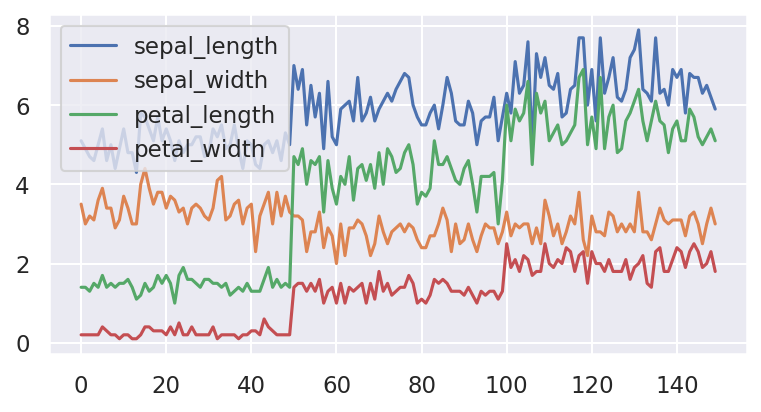

In [6]:
iris.plot() # Se genera el grafico con las columnas numericas y una leyenda automaticamente

### Bar Plots

Los gráficos de barras son uno de los gráficos más utilizados a la hora de visualizar datos. Este gráfico generalmente contiene valores numéricos en el eje y y valores categóricos en el eje x.

El método de barra se usa para mostrar las barras verticalmente y la función barh se usa para mostrar las barras horizontalmente. Para mostrar esto, primero creemos una serie de datos.

In [7]:
data = pd.Series(np.random.rand(5),
                 index = list('adcde'))
data

a    0.206653
d    0.948569
c    0.347767
d    0.900014
e    0.448997
dtype: float64

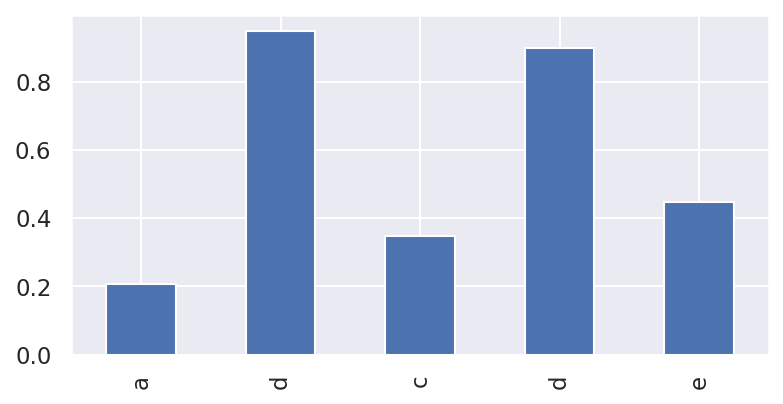

In [8]:
data.plot.bar(color='b', alpha=1)

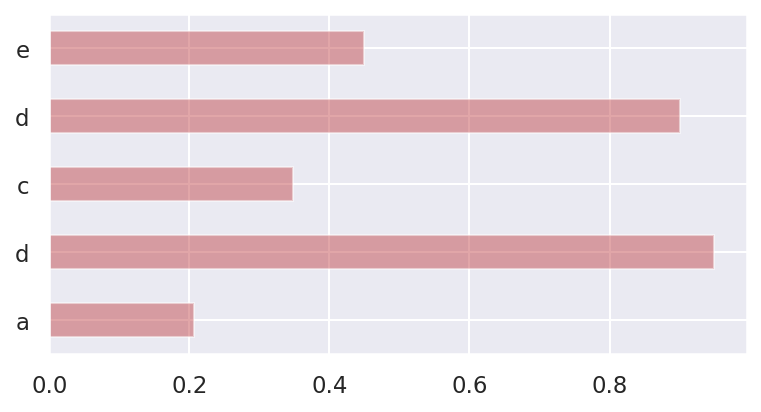

In [9]:
data.plot.barh(color='r', alpha = 0.5)

Ahora vamos a mostrar los diagramas de barras para el marco de datos. Para mostrar esto, vamos a crear un conjunto de datos.

In [ ]:
df = pd.DataFrame(
    np.random.rand(5,3),
    index=['one','two','three','four','five'],
    columns=[pd.Index(list("ABC"))]
)

df.head()

,A,B,C
one,0.430802,0.661692,0.571610
two,0.682998,0.911560,0.791441
three,0.852984,0.364336,0.460625
four,0.496587,0.048701,0.808594
five,0.746595,0.153639,0.974789


Ahora dibujemos las gráficas de barras de este conjunto de datos.

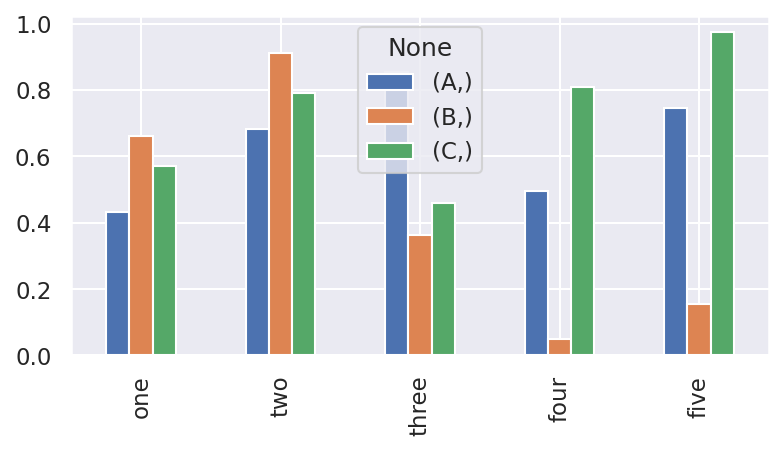

In [ ]:
df.plot.bar()

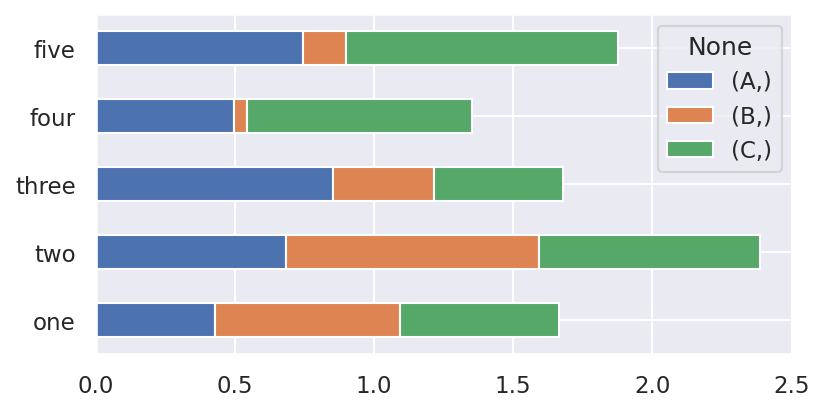

In [ ]:
df.plot.barh(stacked=True, alpha=1)

Tenga en cuenta que, al dibujar el gráfico de barras, a veces las barras muestran los valores del conjunto de datos y, a veces, las estadísticas del conjunto de datos. Ahora dibujemos los diagramas de barras utilizando algunos cálculos de las variables en el conjunto de datos. Para mostrar esto, importemos el conjunto de datos de consejos. Puede cargar este conjunto de datos usando el método load_datasets () en la biblioteca Seaborn.

In [ ]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Manejemos las columnas de tamaño y días en el conjunto de datos con el método de tabulación cruzada.

In [ ]:
day_size = pd.crosstab(tips["day"], tips["size"])

In [ ]:
day_size

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


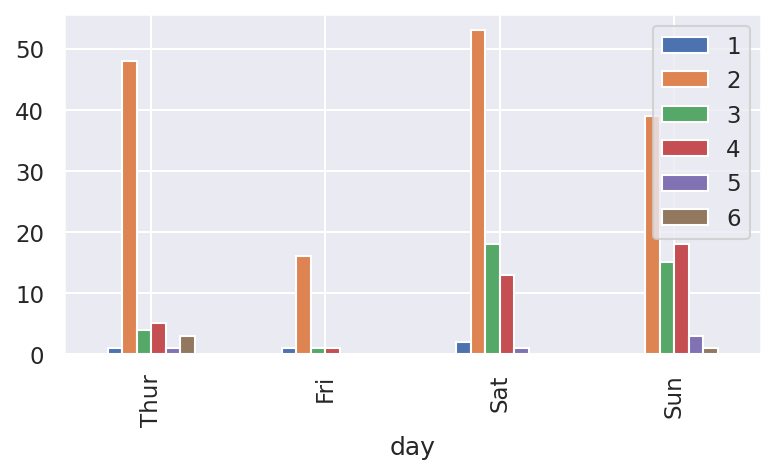

In [ ]:
day_size.plot.bar()
plt.legend(loc='upper right')

Puede dibujar fácilmente las gráficas de los cálculos estadísticos. Para mostrar esto, calculemos el porcentaje de propina diaria y agreguemos estos valores al conjunto de datos.

In [ ]:
tips['tips_perc'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


Puede ver los porcentajes de propinas diarias con barras de error utilizando el método de gráfico de barras.

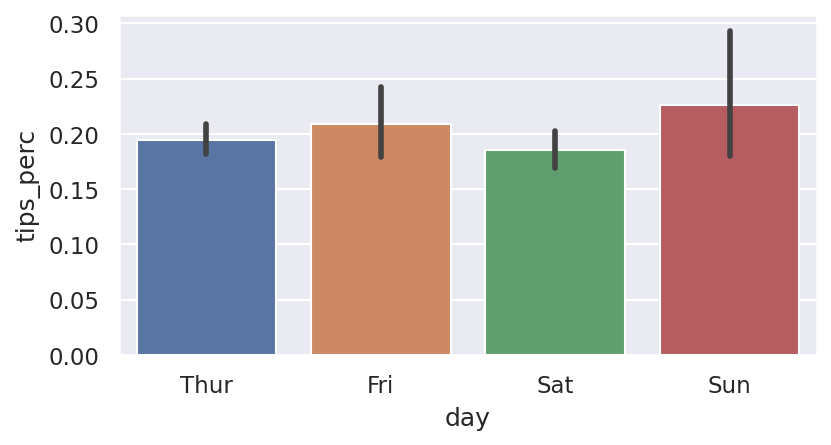

In [ ]:
sns.barplot(x='day', y = 'tips_perc',
            data=tips, orient = 'v')

Puede ver en la gráfica que la mayoría de las propinas se pagan los domingos y viernes. El método de gráfico de barras tiene el parámetro de tono. Puede usar este parámetro para los valores categóricos.

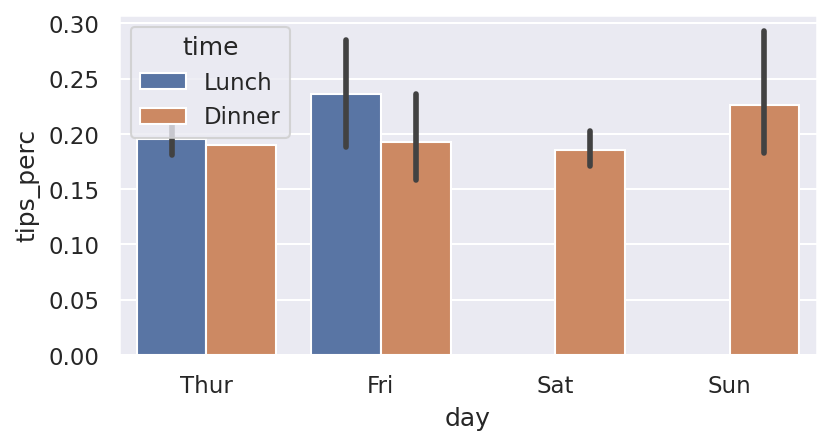

In [ ]:
sns.barplot(x='day',
            y='tips_perc',
            hue='time',data=tips,orient='v')

### Histogramas y diagramas de densidad

Un histograma es un tipo de gráfico de barras que indica la frecuencia de los valores en el conjunto de datos. Veamos la frecuencia de los porcentajes de datos.

In [ ]:
tips['tips_perc'].head()

0    0.063204
1    0.191244
2    0.199886
3    0.162494
4    0.172069
Name: tips_perc, dtype: float64

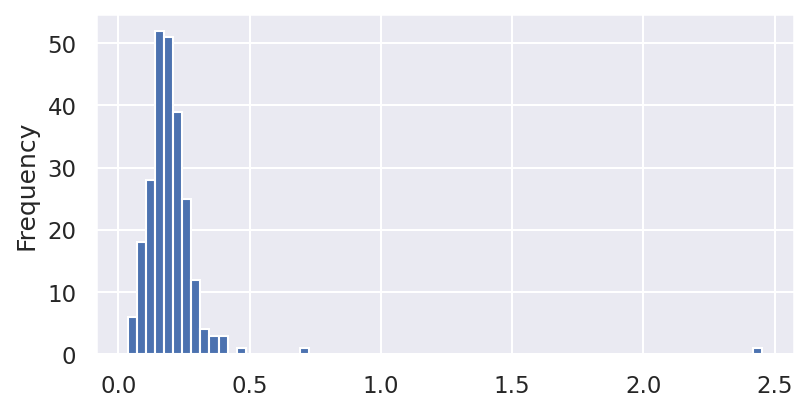

In [ ]:
tips['tips_perc'].plot.hist(bins=70)

Tenga en cuenta que cada barra aquí representa el número de valores de observación.
Si desea dibujar el histograma con la curva de densidad, puede usar el método histplot con el parámetro kde=True.

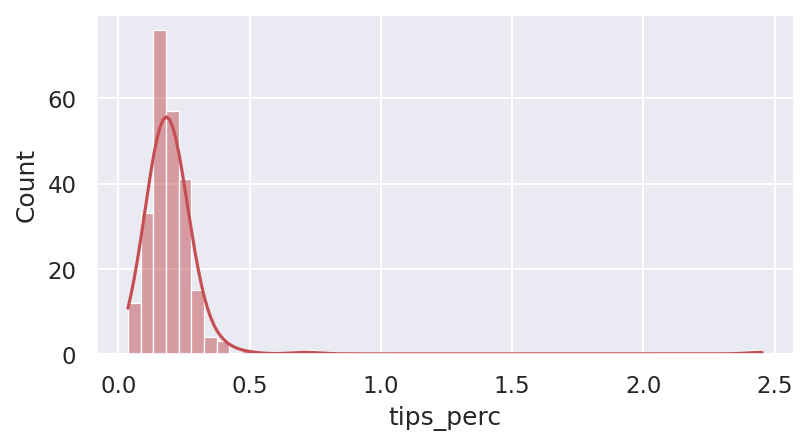

In [ ]:
sns.histplot(tips['tips_perc'], kde=True,
             bins = 50, color='r')

### Scatter o Point Plots

Se utiliza un diagrama de dispersión para ver la relación entre dos variables. Por ejemplo, veamos la relación entre la longitud del sépalo y la longitud del pétalo en el conjunto de datos del iris. Para hacer esto, puede usar el método regplot en Seaborn.

Puede ver las relaciones binarias de todas las variables numéricas en el conjunto de datos con el método pairplot().

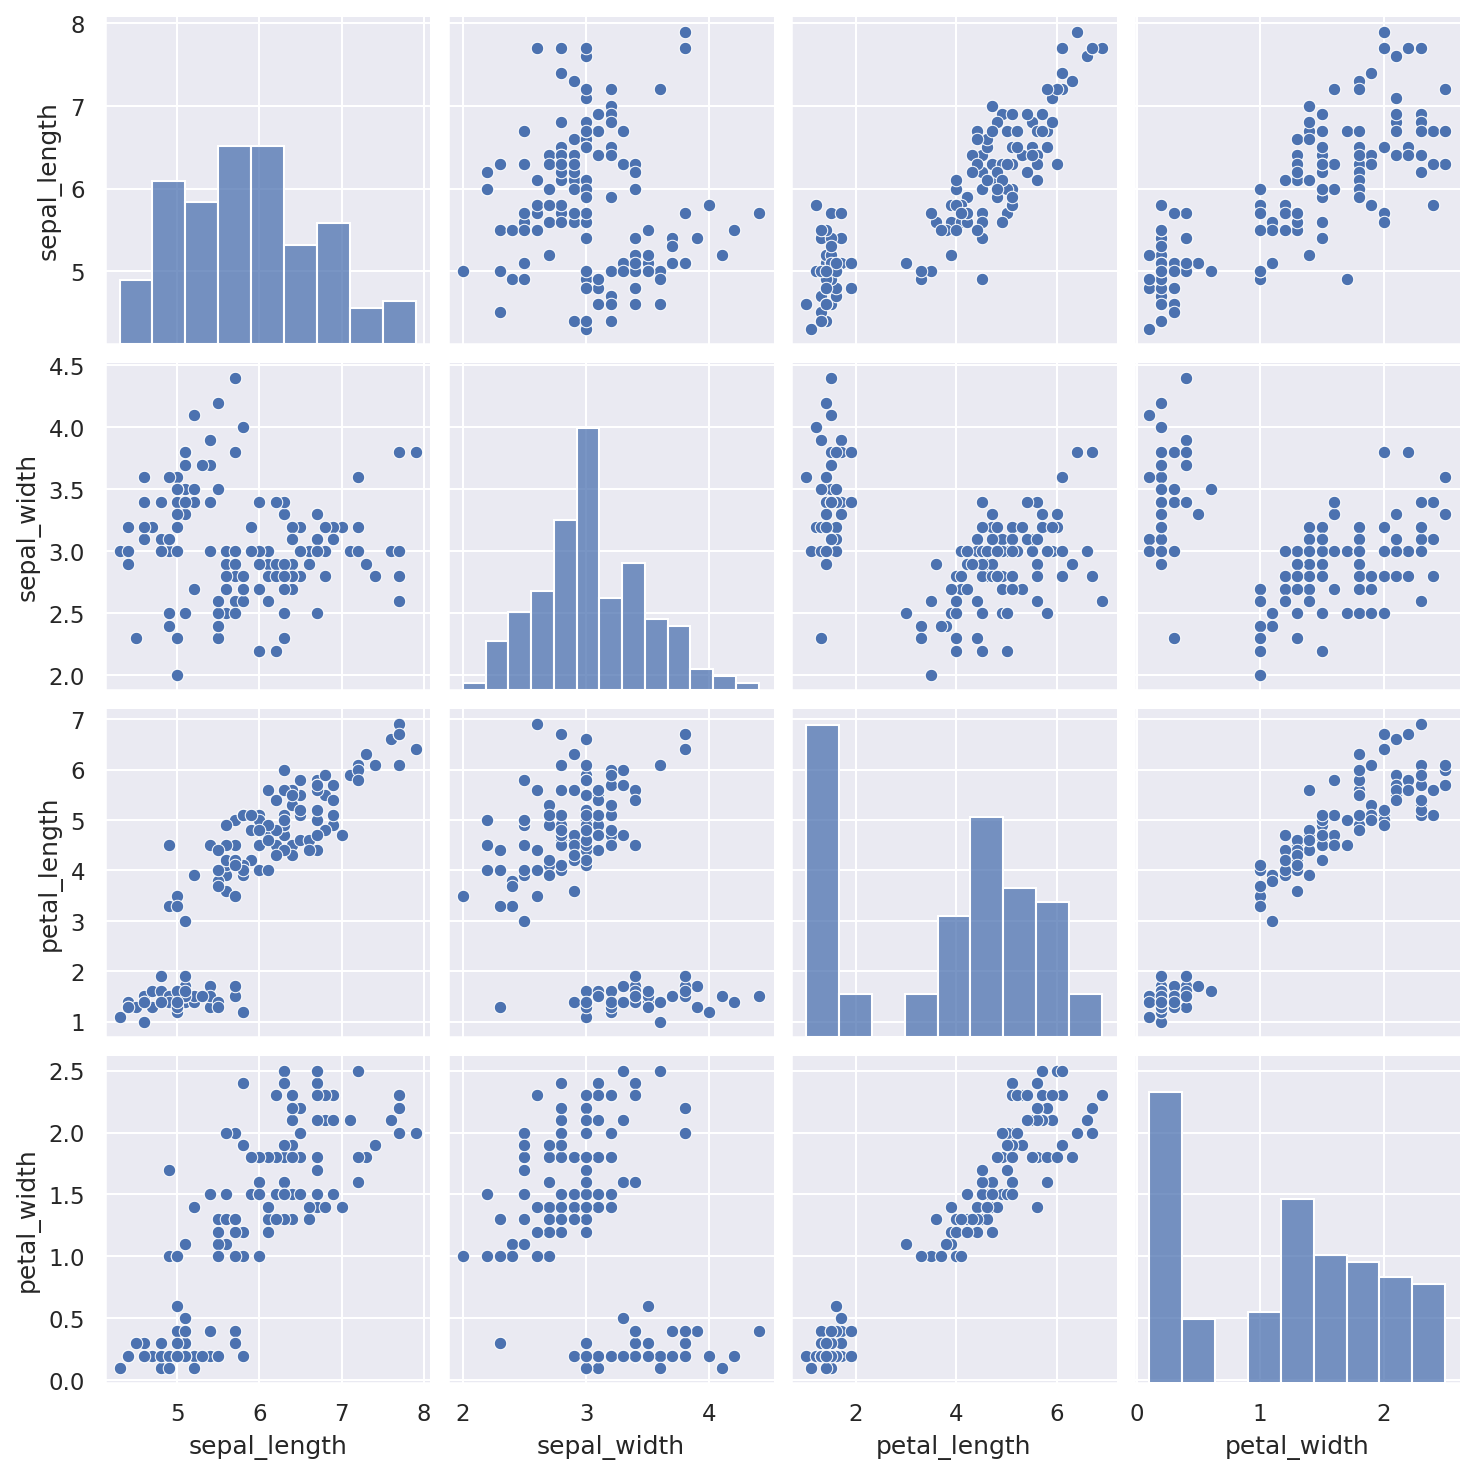

In [ ]:
sns.pairplot(iris)

Puede ver las categorías con el parámetro de tono.

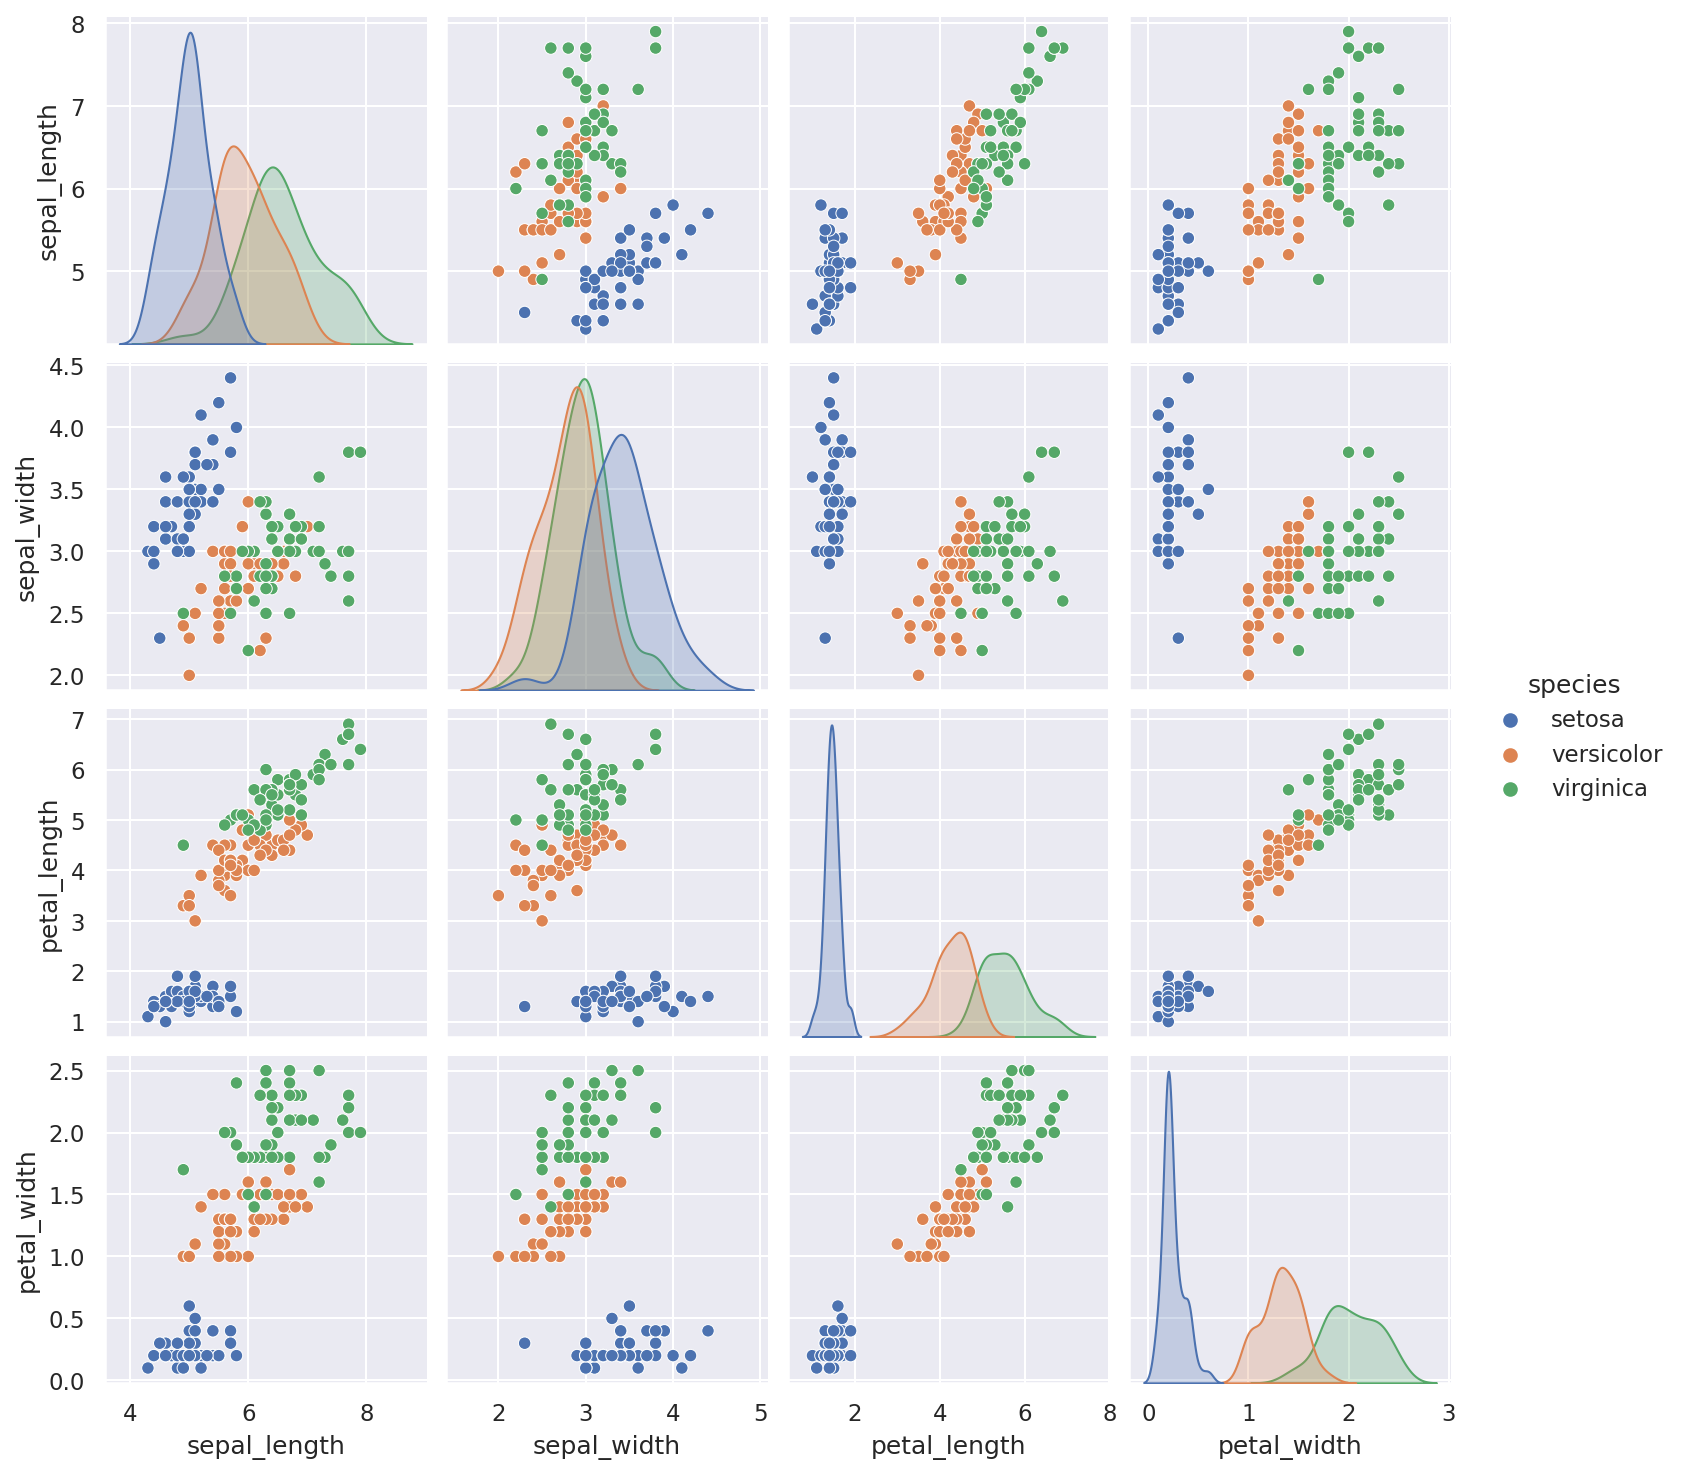

In [ ]:
sns.set(rc={"figure.figsize":(1.5, 1.5)})
sns.pairplot(iris, hue="species")


### Cuadrículas de facetas y datos categóricos

El método catplot le permite dibujar el gráfico de más de una variable categórica. Por ejemplo, manejemos el conjunto de datos de consejos y echemos un vistazo a este conjunto de datos nuevamente.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


Como puede ver, las variables fumador, día y hora son variables categóricas. Ahora veamos el gráfico de porcentajes de propinas usando estas variables categóricas.

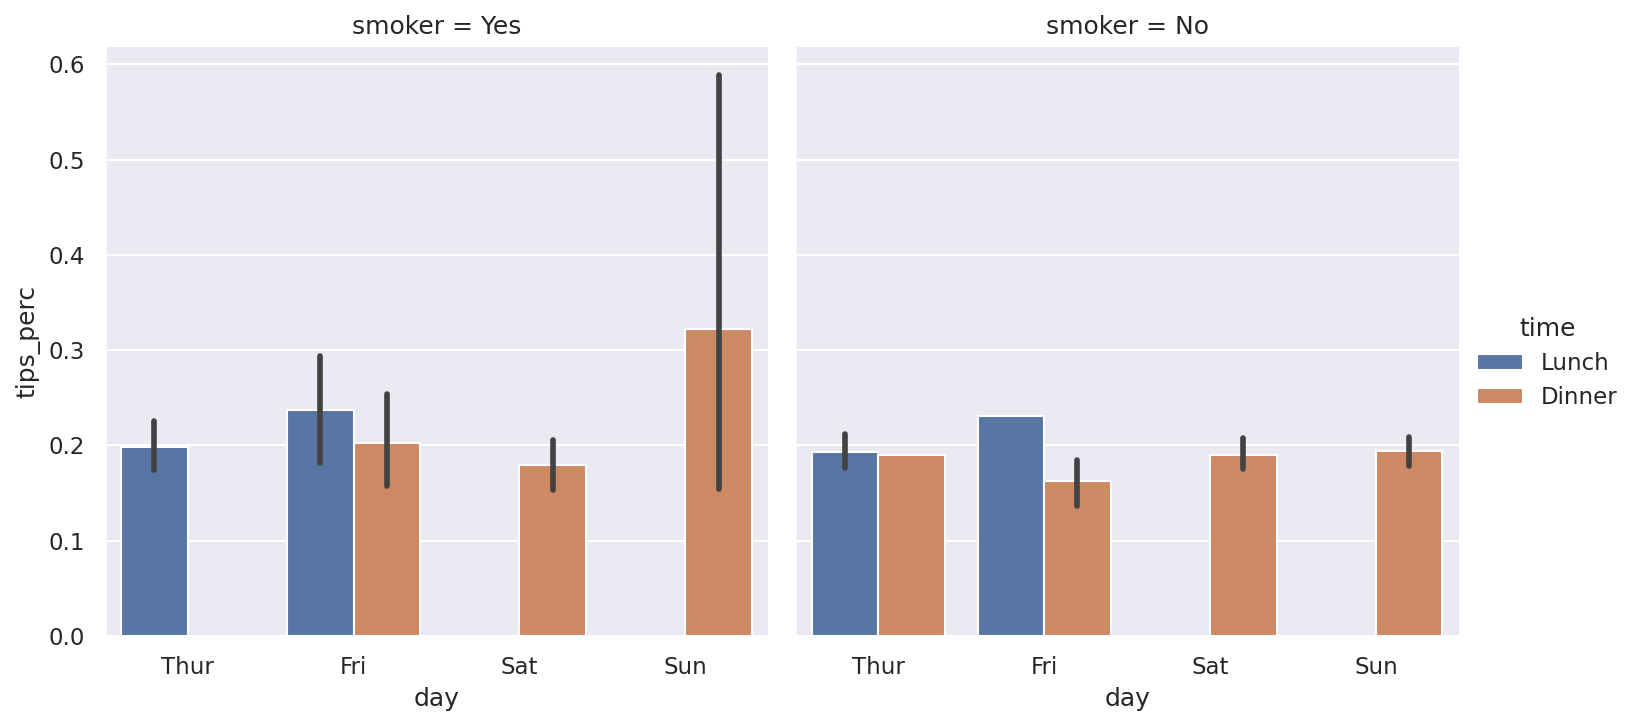

In [ ]:
sns.catplot(
    x='day', y='tips_perc',
    hue='time', col='smoker',
    kind='bar', data=tips)

Veamos la trama de fumadores y no fumadores por separado por tiempo.

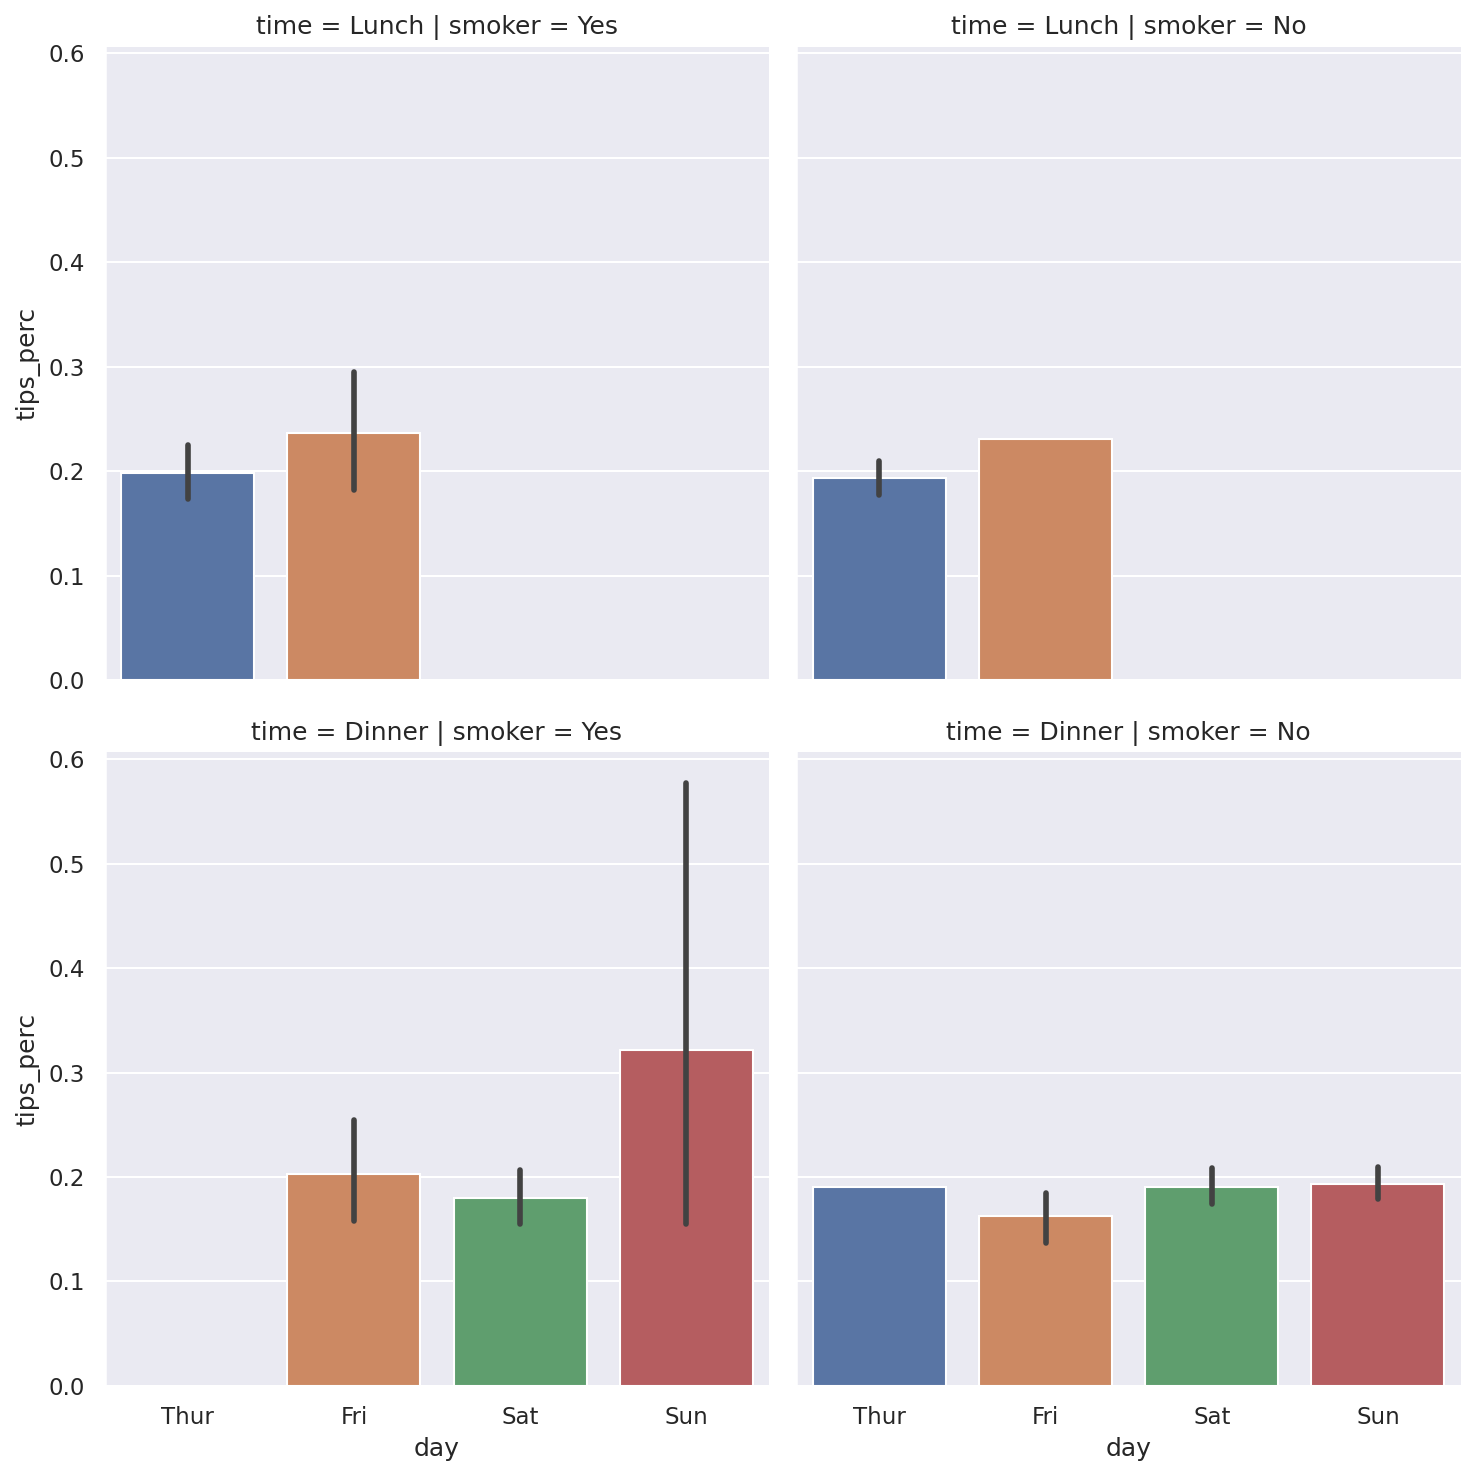

In [ ]:
sns.catplot(
    x='day', y='tips_perc',
    row='time', col='smoker',
    kind='bar', data=tips)

Tenga en cuenta que los porcentajes de propinas de los fumadores nocturnos son más altos que los demás, pero el intervalo de confianza de estas personas es bastante amplio, por lo que dieron propinas muy altas o bajas.

Puede cambiar el tipo de gráfico en el método catplot(). Por ejemplo, puede usar el parámetro kind = 'box' para ver el diagrama de caja.

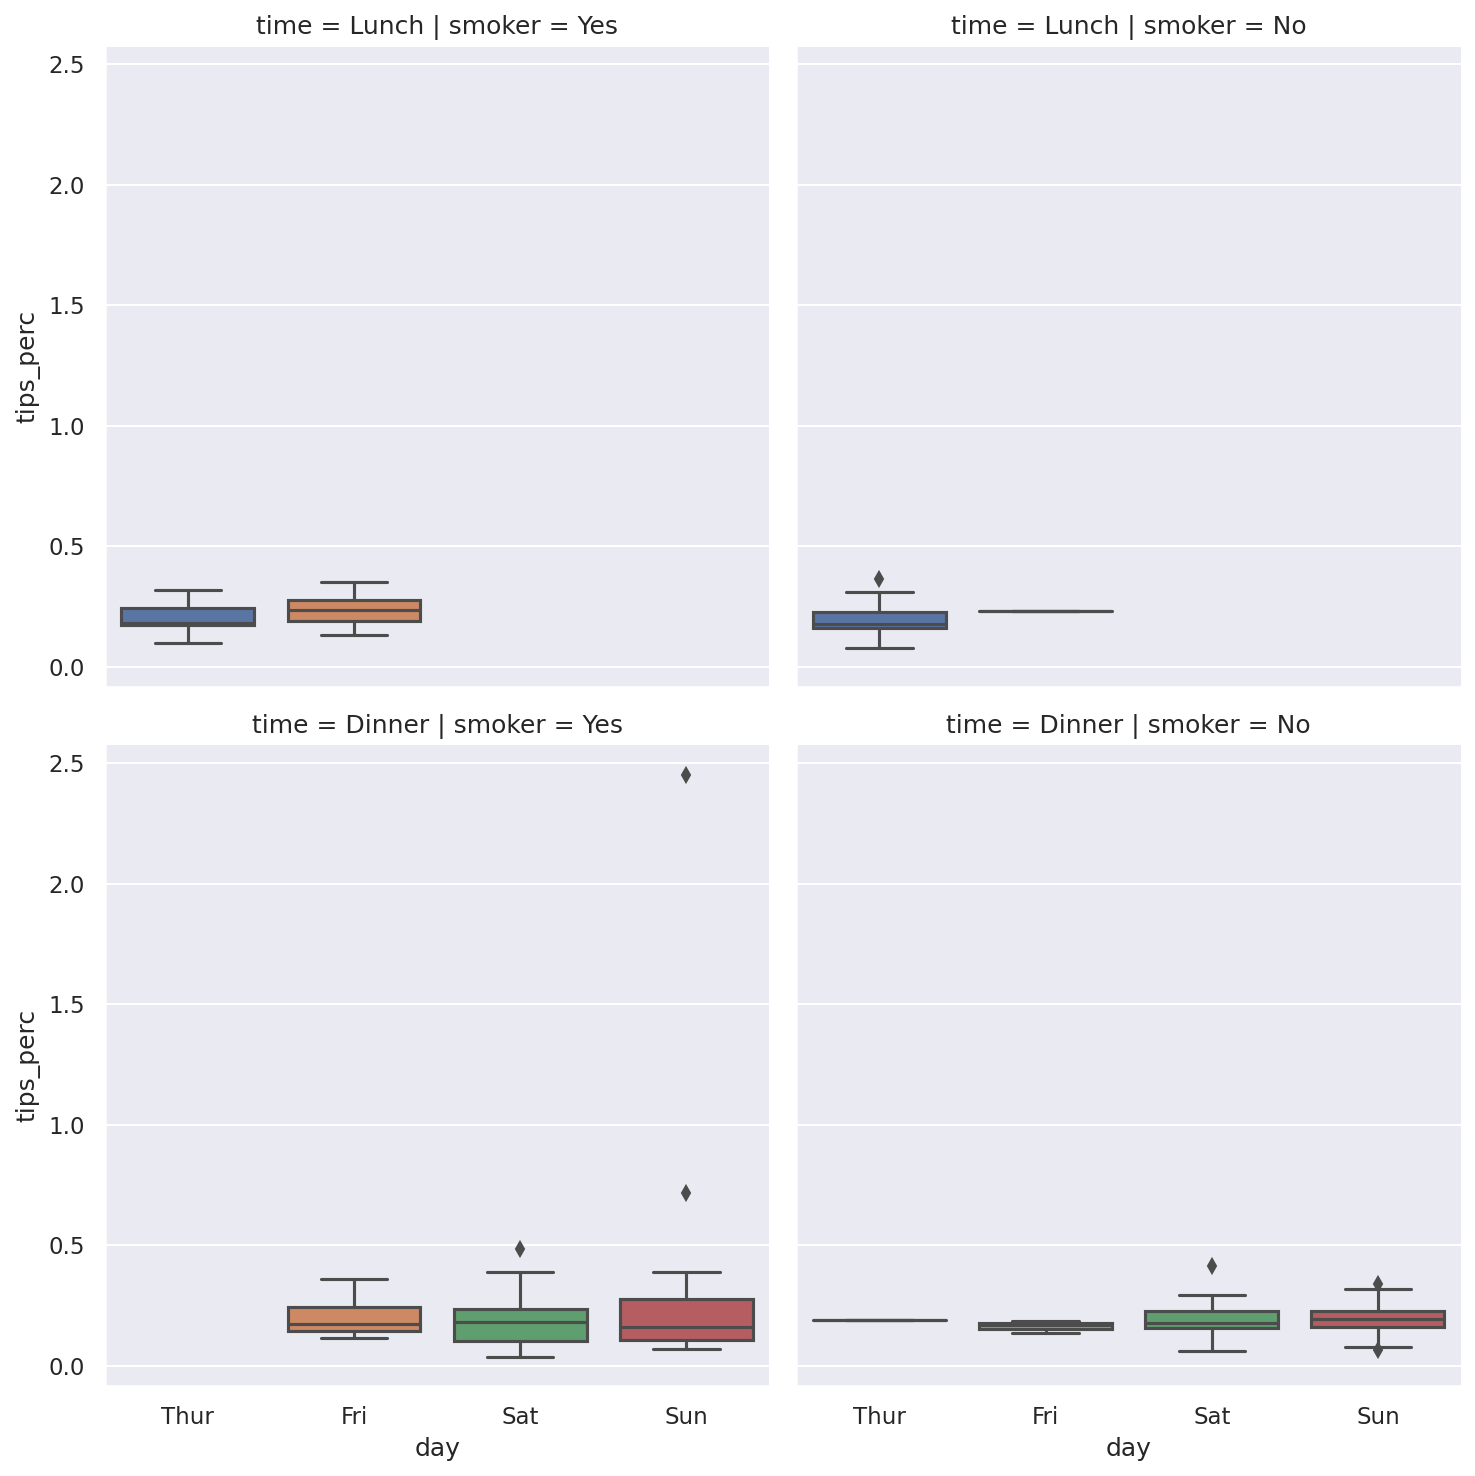

In [ ]:
sns.catplot(x='day',y='tips_perc',
            row='time', col='smoker',
            kind='box', data=tips)

El diagrama de caja también muestra valores atípicos. Puede pensar en los valores fuera de los cuadros como valores atípicos.

# Visualización de dashboards con Panel/Hvplot

In [11]:
# pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.4 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [13]:
# Caché de datos para mejorar el rendimiento del tablero
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [14]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['country'] == 'North America']

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
30258,North America,1750,NaN,11396206.0,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30259,North America,1751,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30260,North America,1752,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30261,North America,1753,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30262,North America,1754,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,North America,2017,NaN,581258143.0,NaN,75.813,0.131,6425.781,-47.450,-0.733,...,16.573,20.852,25.996,11.418,24.038,9.941,7418.35,7566.229,386.995,6.023
30526,North America,2018,NaN,585864285.0,NaN,74.562,0.127,6614.565,188.784,2.938,...,16.308,23.347,27.322,12.033,24.345,8.880,7630.50,7777.590,388.395,5.872
30527,North America,2019,NaN,590497015.0,NaN,75.227,0.127,6500.850,-113.715,-1.719,...,16.071,25.761,27.536,11.097,24.243,9.281,7515.65,7663.030,382.097,5.878
30528,North America,2020,NaN,594263186.0,NaN,75.718,0.127,5805.619,-695.230,-10.694,...,15.855,23.337,27.318,12.876,23.093,9.241,NaN,NaN,450.022,7.751


In [ ]:
df[df['country'] == 'World']

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
45735,World,1750,NaN,7.456645e+08,NaN,NaN,NaN,9.351,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45736,World,1751,NaN,NaN,NaN,NaN,NaN,9.351,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45737,World,1752,NaN,NaN,NaN,NaN,NaN,9.354,0.004,0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45738,World,1753,NaN,NaN,NaN,NaN,NaN,9.354,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45739,World,1754,NaN,NaN,NaN,NaN,NaN,9.358,0.004,0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46002,World,2017,NaN,7.599822e+09,1.104307e+14,1507.923,0.198,36096.738,572.547,1.612,...,100.0,100.0,100.0,100.0,100.0,100.0,48251.879,47031.820,0.000,0.0
46003,World,2018,NaN,7.683790e+09,1.136302e+14,1569.218,0.204,36826.508,729.772,2.022,...,100.0,100.0,100.0,100.0,100.0,100.0,49368.039,47980.469,-0.004,-0.0
46004,World,2019,NaN,7.764951e+09,NaN,1617.507,0.208,37082.559,256.049,0.695,...,100.0,100.0,100.0,100.0,100.0,100.0,49758.230,48116.559,0.000,0.0
46005,World,2020,NaN,7.840953e+09,NaN,1637.537,0.209,35264.086,-1818.472,-4.904,...,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.000,0.0


In [ ]:
# Algunos preprocesamiento de datos menores

In [ ]:
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!= 0, df['gdp']/ df['population'], 0)

In [ ]:
# Hacer que la canalización de DataFrame sea interactiva
idf = df.interactive()

In [ ]:
## (1) Emisiones de CO2 a lo largo del tiempo por continente

In [ ]:
# Definir widgets de panel
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
year_slider

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1850)

In [ ]:
# Botones de radio para medidas de CO2
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['co2', 'co2_per_capita',],
    button_type='success'
)

In [ ]:
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [ ]:
co2_pipeline

In [ ]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="Emisiones de CO2 por continente")
co2_plot

### Tabla - Emisiones de CO2 a lo largo del tiempo por continente

In [ ]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
co2_table

In [ ]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [ ]:
co2_vs_gdp_scatterplot_pipeline

In [ ]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
                                                                y='co2', 
                                                                by='country', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
co2_vs_gdp_scatterplot

### Gráfico de barras con fuentes de CO2 por continente

In [ ]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['coal_co2', 'oil_co2', 'gas_co2'], 
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year', 'country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [ ]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='country', 
                                                     y=yaxis_co2_source, 
                                                     title='CO2 source by continent')
co2_source_bar_plot

## Creating Dashboard

In [ ]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('https://raw.githubusercontent.com/thu-vu92/python-dashboard-panel/main/climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)

# template.show()
template.servable();